In [ ]:
 import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
16/16 - 2s - loss: 0.6259 - accuracy: 0.7026 - val_loss: 0.5847 - val_accuracy: 0.7236 - 2s/epoch - 98ms/step
Epoch 2/50
16/16 - 0s - loss: 0.5443 - accuracy: 0.7475 - val_loss: 0.5455 - val_accuracy: 0.6992 - 95ms/epoch - 6ms/step
Epoch 3/50
16/16 - 0s - loss: 0.5048 - accuracy: 0.7699 - val_loss: 0.5162 - val_accuracy: 0.6992 - 100ms/epoch - 6ms/step
Epoch 4/50
16/16 - 0s - loss: 0.4797 - accuracy: 0.7658 - val_loss: 0.5013 - val_accuracy: 0.7154 - 85ms/epoch - 5ms/step
Epoch 5/50
16/16 - 0s - loss: 0.4669 - accuracy: 0.7658 - val_loss: 0.4892 - val_accuracy: 0.7154 - 91ms/epoch - 6ms/step
Epoch 6/50
16/16 - 0s - loss: 0.4567 - accuracy: 0.7719 - val_loss: 0.4837 - val_accuracy: 0.7317 - 101ms/epoch - 6ms/step
Epoch 7/50
16/16 - 0s - loss: 0.4490 - accuracy: 0.7780 - val_loss: 0.4795 - val_accuracy: 0.7317 - 103ms/epoch - 6ms/step
Epoch 8/50
16/16 - 0s - loss: 0.4439 - accuracy: 0.7780 - val_loss: 0.4770 - val_accuracy: 0.7317 - 78ms/epoch - 5ms/step
Epoch 9/50
16/16 - 0s 

In [ ]:
# Use model.predict to get probabilities
y_prob = model.predict(X_test)

# Convert probabilities to classes (0 or 1) by rounding
y_pred = np.round(y_prob)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

5/5 [==============================] - 0s 5ms/step
Accuracy: 0.7402597402597403
Confusion Matrix:
[[80 19]
 [21 34]]


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/300
16/16 [==============================] - 0s 7ms/step - loss: 0.4463 - accuracy: 0.7902 - val_loss: 0.4686 - val_accuracy: 0.7480
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4242 - accuracy: 0.7882 - val_loss: 0.4733 - val_accuracy: 0.7398
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.8228 - val_loss: 0.4742 - val_accuracy: 0.7480
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4250 - accuracy: 0.8106 - val_loss: 0.4712 - val_accuracy: 0.7480
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4302 - accuracy: 0.7984 - val_loss: 0.4736 - val_accuracy: 0.7561
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4249 - accuracy: 0.8045 - val_loss: 0.4737 - val_accuracy: 0.7561
Epoch 7/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4096 - accuracy: 0.8147 - val_loss: 0.4750 - val_accuracy: 0.7561
Epoch 8/300
1

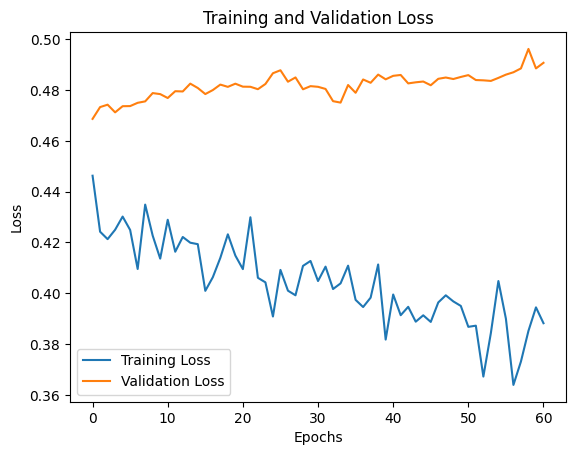

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

5/5 [==============================] - 0s 9ms/step - loss: 0.5939 - accuracy: 0.7143
Test Accuracy: 0.7142857313156128


Epoch 1/200
16/16 [==============================] - 2s 22ms/step - loss: 0.7000 - accuracy: 0.4990 - val_loss: 0.6622 - val_accuracy: 0.6179
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6056 - accuracy: 0.6884 - val_loss: 0.6268 - val_accuracy: 0.6585
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5762 - accuracy: 0.7128 - val_loss: 0.5962 - val_accuracy: 0.6667
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7352 - val_loss: 0.5717 - val_accuracy: 0.6911
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7495 - val_loss: 0.5410 - val_accuracy: 0.6992
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4993 - accuracy: 0.7515 - val_loss: 0.5163 - val_accuracy: 0.7317
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5004 - accuracy: 0.7678 - val_loss: 0.5041 - val_accuracy: 0.7398
Epoch 8/200


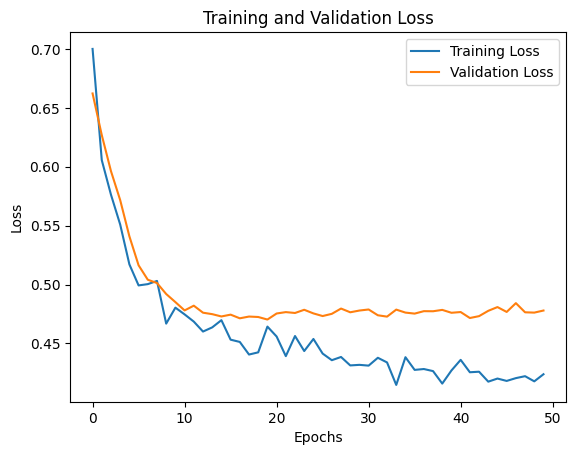

5/5 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7532
Test Accuracy: 0.7532467246055603


In [ ]:
# Build the ANN model with Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.25))  # Add Dropout layer with a dropout rate of 0.5
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))  # Add Dropout layer with a dropout rate of 0.5
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model with early stopping and dropout
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')